In [18]:
###Parte 1: Familiarizandonos con la base EPH y limpieza

In [19]:
pip install pandas

In [20]:
import pandas as pd

In [21]:
import os

In [22]:
#Importamos los archivos del primer trimestre de la EPH de los años 2004 y 2024

In [23]:
from google.colab import files

uploaded = files.upload()

Saving usu_individual_T104.dta to usu_individual_T104 (1).dta


In [24]:
df_stata = pd.read_stata("usu_individual_T104.dta")

In [25]:
#Imprimimos las columnas para poder elegir la región
print(df_stata.columns)

Index(['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)


In [26]:
df_stata.rename(columns=str.upper, inplace=True)
#Renombramos la columna así coincide con la EPH del 2024

In [27]:
print(df_stata.columns)

Index(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR',
       'PJ1_1', 'PJ2_1', 'PJ3_1', 'IDIMPP'],
      dtype='object', length=176)


In [28]:
from google.colab import files

uploaded = files.upload()

Saving usu_individual_T124.xlsx to usu_individual_T124 (1).xlsx


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
df_excel = pd.read_excel("usu_individual_T124.xlsx")

In [33]:
print(df_excel.columns)

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=177)


In [34]:
#Indicamos la región elegida, en la EPH del 2004 debemos tomarlo como NOA y la del 2024 por su código.
df_excel_noa = df_excel[df_excel["REGION"] == 40]
df_stata_noa = df_stata[df_stata["REGION"] == "NOA"]

In [35]:
print(df_stata_noa.columns.tolist())

['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', '

In [36]:
variables_interes = [
    "CH04", "CH06", "CH07", "CH08", "CH10", "CH11", "CH12", "CH13",
    "NIVEL_ED", "ESTADO", "CAT_OCUP", "CAT_INAC",
    "PP02H", "PP02I", "IPCF"
]

In [37]:
df_stata_noa['CH04'] = df_stata_noa['CH04'].replace({'Varón': 1, 'Mujer': 2})
df_stata_noa['CH04'] = df_stata_noa['CH04'].astype(int)

<ipython-input-37-f7b22828ceea>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_stata_noa['CH04'] = df_stata_noa['CH04'].replace({'Varón': 1, 'Mujer': 2})
<ipython-input-37-f7b22828ceea>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_stata_noa['CH04'] = df_stata_noa['CH04'].replace({'Varón': 1, 'Mujer': 2})
<ipython-input-37-f7b22828ceea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [38]:
#Unimos (append) las bases en una sola base de datos y reiniciamos los índices para que queden en orden
df_stata_noa = df_stata_noa[variables_interes]
df_excel_noa = df_excel_noa[variables_interes]

In [39]:
#Agregamos una columna que nos indique a qué año pertenece cada dato
df_stata_noa["ANO4"] = 2004
df_excel_noa["ANO4"] = 2024

In [40]:
df_unido = pd.concat([df_stata_noa, df_excel_noa], ignore_index=True)

In [67]:
# Lista de las variables de interés
variables_interes = ['IPCF', 'CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC']

# Función para corregir valores negativos en las variables seleccionadas
def corregir_valores_negativos(df, variables):
    for var in variables:
        # Si la variable es numérica y tiene valores negativos, los corregimos
        if df[var].dtype in ['float64', 'int64']:
            df[var] = df[var].apply(lambda x: x if x >= 0 else None)  # Reemplazar valores negativos por NaN
    return df

# Aplicamos la función a todo el dataframe
df_unido = corregir_valores_negativos(df_unido, variables_interes)

# Contamos la cantidad de valores NaN por variable para cada año
nan_count_by_year = df_unido.groupby("ANO4")[variables_interes].apply(lambda x: x.isna().sum())
print(nan_count_by_year)

      IPCF  CH04  CH06  CH07  CH08  NIVEL_ED  ESTADO  CAT_INAC
ANO4                                                          
2004     0     0     0     0     0         0       0         0
2024     0     0     0     0     0         0       0         0


In [66]:
#usamos display para observar que se hayan unido correctamente
display(df_unido)

,CH04,CH06,CH07,CH08,CH10,CH11,CH12,CH13,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP02H,PP02I,IPCF,ANO4
0,2,74.0,Separado o divorciado,Obra social y mutual/prepaga/servicio de emerg...,"No asiste, pero asistió",0.0,Primario,Sí,Primaria Completa,Inactivo,0.0,Jubilado/pensionado,No,No,280.0,2004
1,1,35.0,Unido,No paga ni le descuentan,"No asiste, pero asistió",0.0,Secundario,No,Secundaria Incompleta,Desocupado,Cuenta propia,0.0,0.0,0.0,90.0,2004
2,2,34.0,Unido,No paga ni le descuentan,"No asiste, pero asistió",0.0,Primario,Sí,Primaria Completa,Inactivo,0.0,Ama de casa,Sí,Sí,90.0,2004
3,2,14.0,Soltero,No paga ni le descuentan,"Sí, asiste",Público,Polimodal,No,Secundaria Incompleta,Inactivo,0.0,Estudiante,No,No,90.0,2004
4,1,11.0,Soltero,No paga ni le descuentan,"Sí, asiste",Público,EGB,No,Primaria Incompleta (incluye educación especial),Inactivo,0.0,Estudiante,No,No,90.0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19513,1,59,5,2,2,0,7,2,5,1,1,0,0,0,450000.0,2024
19514,1,32,1,1,2,0,2,1,2,1,3,0,0,0,200000.0,2024
19515,2,30,1,1,2,0,6,2,5,3,0,7,2,2,200000.0,2024
19516,2,9,5,1,1,2,2,2,1,4,0,3,0,0,200000.0,2024


In [42]:
#exportamos como un excel para corroborar que los datos y las columnas estén bien distribuidas
df_unido.to_excel("df_unido.xlsx", index=False)

In [49]:
###Las variables elegidas y su significado según el "Diseño de Registro y Estructura para las bases de Microdatos"
#Variable Significado
#CH04	Sexo
#CH06	Edad
#CH07	Estado civil
#CH08	Cobertura médica
#CH10	Asistencia establecimiento educativo
#CH11	Tipo de establecimiento
#CH12	Nivel más alto completado
#CH13	¿Finalizó?
#NIVEL_ED	Nivel educativo
#ESTADO	Condición de actividad (ocupado, desocupado, inactivo)
#CAT_OCUP	Categoría ocupacional
#CAT_INAC	Categoría de inactividad
#PP02H	En los últimos 12 meses ¿buscó trabajo en algún momento?
#PP02I	En los últimos 12 meses ¿trabajó en algún momento?
#P47T	Ingreso total individual

In [56]:
#Parte II: Primer Análisis Exploratorio

In [55]:
#PUNTO 3

In [52]:
import matplotlib.pyplot as plt

In [53]:
import seaborn as sns

In [54]:
import numpy as np

In [57]:
#Instalamos la biblioteca de matplot y seaborn para poder realizar gráficos visualmente agradables siguiendo las recomendaciones de Schwabish.

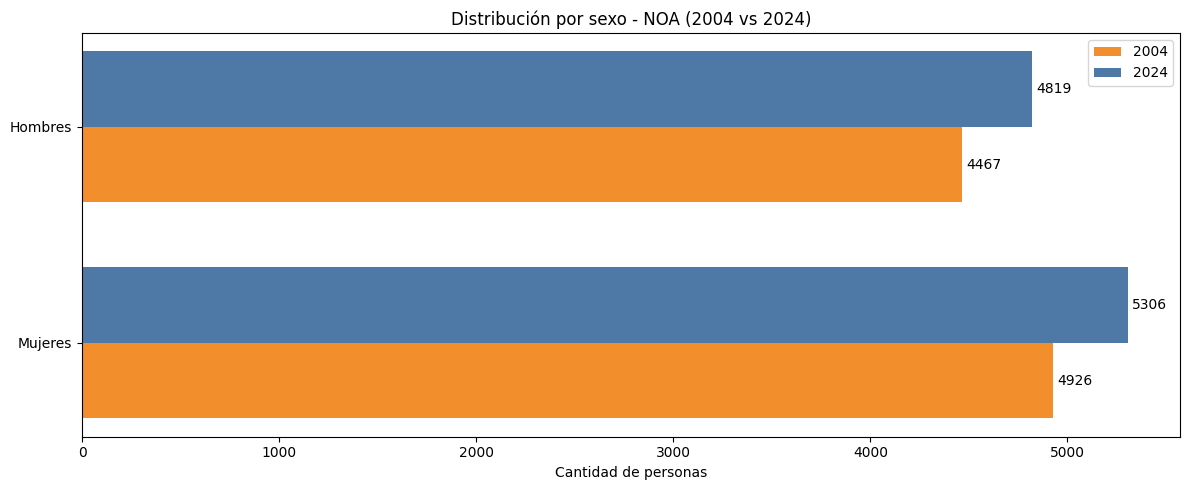

In [61]:
df_2004 = df_unido[df_unido["ANO4"] == 2004].copy()
df_2024 = df_unido[df_unido["ANO4"] == 2024].copy()

# Normalizar etiquetas
df_2004["SEXO"] = df_2004["CH04"].replace({1: "Hombres", 2: "Mujeres"})
df_2024["SEXO"] = df_2024["CH04"].replace({1: "Hombres", 2: "Mujeres"})

# Conteo por sexo
count_2004 = df_2004["SEXO"].value_counts().reindex(["Mujeres", "Hombres"], fill_value=0)
count_2024 = df_2024["SEXO"].value_counts().reindex(["Mujeres", "Hombres"], fill_value=0)

# Configurar posiciones y tamaño
labels = ['Mujeres', 'Hombres']
y = np.arange(len(labels))
width = 0.35  # separación de barras

fig, ax = plt.subplots(figsize=(12, 5))

# Barras
bar1 = ax.barh(y - width/2, count_2004.values, height=width, label='2004', color='#f28e2b')
bar2 = ax.barh(y + width/2, count_2024.values, height=width, label='2024', color='#4e79a7')

# Etiquetas y leyenda
ax.set_xlabel('Cantidad de personas')
ax.set_title('Distribución por sexo - NOA (2004 vs 2024)')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()

# Mostrar valores en las barras
for bars in [bar1, bar2]:
    for bar in bars:
        width_val = bar.get_width()
        ax.annotate(f'{int(width_val)}',
                    xy=(width_val, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),
                    textcoords="offset points",
                    va='center', ha='left')

plt.tight_layout()
plt.show()

In [59]:
#PUNTO 4

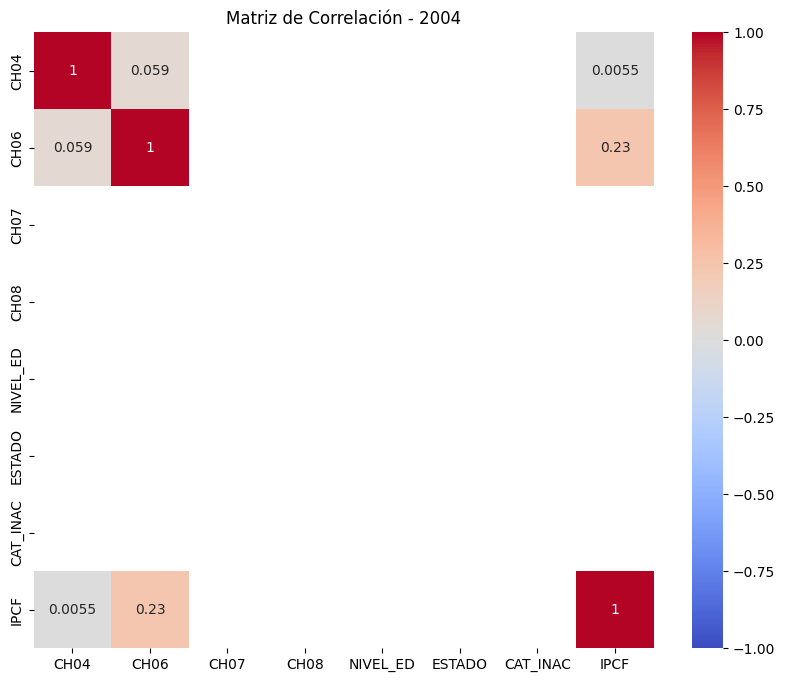

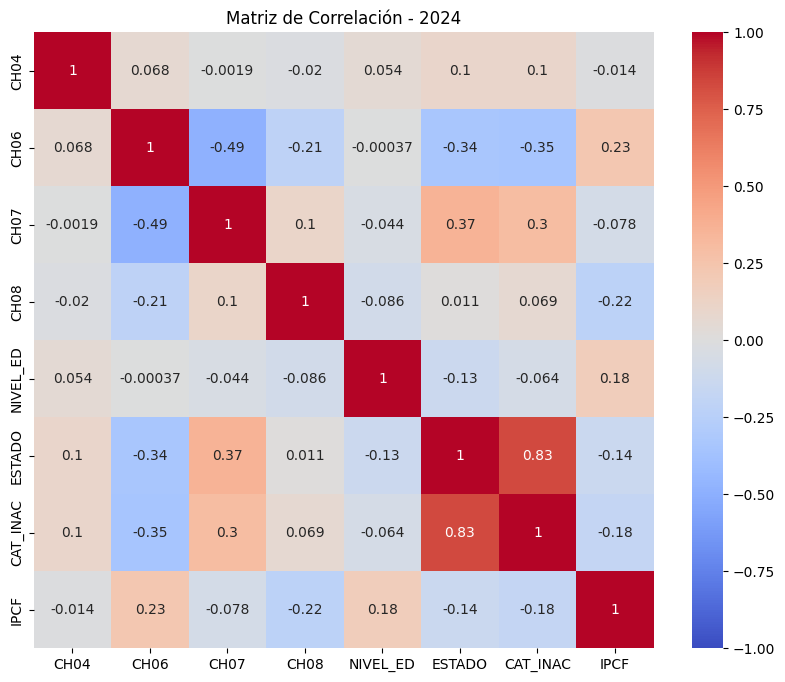

In [60]:
# Lista de variables que nos interesan
variables = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

# Filtrar año 2004
df_2004 = df_unido[df_unido["ANO4"] == 2004]
df_2024 = df_unido[df_unido["ANO4"] == 2024]

# Asegurarse que 2004 sea numérico
df_corr_2004 = df_2004[variables].apply(pd.to_numeric, errors='coerce')

# En 2024 ya son numéricas, se puede usar directamente
df_corr_2024 = df_2024[variables]

# Matriz de correlación 2004
corr_2004 = df_corr_2004.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_2004, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación - 2004')
plt.show()

# Matriz de correlación 2024
corr_2024 = df_corr_2024.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_2024, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación - 2024')
plt.show()

In [ ]:
#parte 3

In [70]:
# Calcular el número de desocupados e inactivos
desocupados_2004 = df_2004_sexo[df_2004_sexo['ESTADO'] == 2]  # Suponiendo que '2' es desocupado
desocupados_2024 = df_2024_sexo[df_2024_sexo['ESTADO'] == 2]

inactivos_2004 = df_2004_sexo[df_2004_sexo['ESTADO'] == 3]  # Suponiendo que '3' es inactivo
inactivos_2024 = df_2024_sexo[df_2024_sexo['ESTADO'] == 3]

# Calcular la media de IPCF por estado para 2004 y 2024
media_ipcf_2004 = df_2004_sexo.groupby('ESTADO')['IPCF'].mean()
media_ipcf_2024 = df_2024_sexo.groupby('ESTADO')['IPCF'].mean()

# Imprimir los resultados
print(f"Cantidad de desocupados en 2004: {len(desocupados_2004)}")
print(f"Cantidad de desocupados en 2024: {len(desocupados_2024)}")
print(f"Cantidad de inactivos en 2004: {len(inactivos_2004)}")
print(f"Cantidad de inactivos en 2024: {len(inactivos_2024)}")
print(f"Media IPCF por estado en 2004:\n{media_ipcf_2004}")
print(f"Media IPCF por estado en 2024:\n{media_ipcf_2024}")

Cantidad de desocupados en 2004: 0
Cantidad de desocupados en 2024: 186
Cantidad de inactivos en 2004: 0
Cantidad de inactivos en 2024: 4317
Media IPCF por estado en 2004:
ESTADO
Desocupado                                                      148.819264
Entrevista individual no realizada (no respuesta al cuestion    171.791667
Inactivo                                                        210.570958
Menor de 10 años                                                146.581933
Ocupado                                                         259.045528
Name: IPCF, dtype: float64
Media IPCF por estado en 2024:
ESTADO
0         0.000000
1    292969.663853
2    187483.535968
3    242159.131756
4    186927.605497
Name: IPCF, dtype: float64


In [71]:
# Filtrar las personas que respondieron sobre su condición de actividad (ESTADO != 0)
respondieron = df_unido[df_unido['ESTADO'] != 0]

# Filtrar las personas que no respondieron sobre su condición de actividad (ESTADO == 0)
norespondieron = df_unido[df_unido['ESTADO'] == 0]

# Imprimir los resultados
print(f"Cantidad de personas que respondieron sobre su condición de actividad: {len(respondieron)}")
print(f"Cantidad de personas que no respondieron sobre su condición de actividad: {len(norespondieron)}")

Cantidad de personas que respondieron sobre su condición de actividad: 19510
Cantidad de personas que no respondieron sobre su condición de actividad: 8
